In [2]:
import jieba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from jieba.analyse import extract_tags

In [4]:
with open('D:/comments.txt','w',encoding='utf-8') as fw:
    df = pd.read_csv('D:/comments.csv')['评论']
    for line in df:
        fw.write(line[1:-1]+'\n')

In [27]:
def get_keywords(txtpath, max_words=50):
    content = open(txtpath, 'r', encoding='utf-8').read()  #评论内容
    #根据tf-idf值找出文件中的关键词
    tags = extract_tags(content, topK=max_words)
    #分析得到关键词的词频
    word_freq_dict = dict()
    word_list = jieba.lcut(content)
    for tag in tags:
        freq = word_list.count(tag)
        word_freq_dict[tag] = freq
    return word_freq_dict

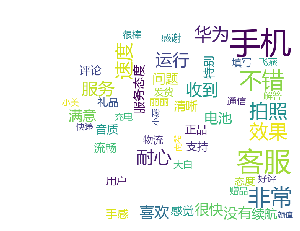

In [32]:
max_words=50
keyword = get_keywords('D:/comments.txt',max_words)
background_pic = np.array(Image.open('background.png'))
wc = WordCloud(
    background_color='white', # 背景色
    max_words=max_words, # 最多词语数量
    font_path='C:\WINDOWS\FONTS\MSYH.TTC', # 字体
    mask=background_pic # 背景形状
)

wc.generate_from_frequencies(keyword)
plt.imshow(wc)
plt.axis("off")
plt.show()  # 绘制词云
# wc.to_file("wc.jpg")